## Read GMT *.grd file

The GRD file is prepared as follows:

```bash
cd ~/data/test/FernandinaSenDT128/mintpy/geo
save_gmt.py geo_velocity.h5
```

In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt

work_dir = os.path.expanduser('~/data/test/FernandinaSenDT128/mintpy/geo')
os.chdir(work_dir)
print('Go to directory', work_dir)

fname = os.path.join(work_dir, 'geo_velocity.grd')

Go to directory /Users/yunjunz/data/test/FernandinaSenDT128/mintpy/geo


### Use `gdal`

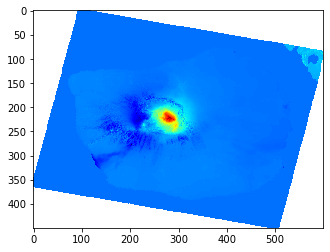

In [2]:
# read
import gdal
ds = gdal.Open(fname, gdal.GA_ReadOnly)
data = np.array(ds.ReadAsArray(), dtype=np.float32)

# plot
plt.figure()
plt.imshow(data, cmap='jet')
plt.show()

### Use `scipy.io.netcdf_file`

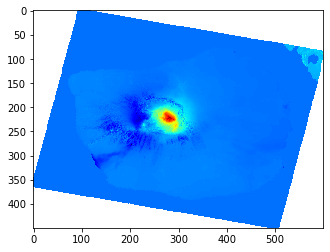

In [3]:
# read
from scipy.io import netcdf_file as netcdf
with netcdf(fname, 'r') as f:
    width, length = f.variables['dimension'][:]
    data = np.array(f.variables['z'][:].reshape(length, width), dtype=np.float32)

# plot
plt.figure()
plt.imshow(data, cmap='jet')
plt.show()